# Supervised Machine Learning

Supervised learning is used when the target variable is present in the dataset. Models can be trained on classification (Target variable is categorical) or regression data (Target variable is continuous).

## AIM: To apply linear regression over the 2 dimensional data

## Name: Shatakshi Shukla

# Linear Regression

## Import Libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # To Split data for training and testing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # To evaluate model
from sklearn.preprocessing import MinMaxScaler # To scale train data
from sklearn.linear_model import LinearRegression # Linear Regression Model
%matplotlib inline

## Read Data from the Link Provided

In [2]:
# Load Data from link in dataframe
data=pd.read_csv('http://bit.ly/w-data')
print('Data Loaded')

Data Loaded


## Data Description

In [3]:
data.head() # It returns the top five rows of the data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Dataset has two columns 'Hours' and 'Scores' where 'Hours' is independent feature and 'Scores' is target feature.

In [4]:
data.describe() # Returns data columns statistical properties

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


1. Data has 25 rows.
2. Min and Max hours are 1.1 and 9.2 respectively. Mean and median of hours are 5.01 and 4.8 which are almost similar. So, data is almost normally distributed

## Plotting our data

Text(0.5, 1.0, 'Hours v/s Scores')

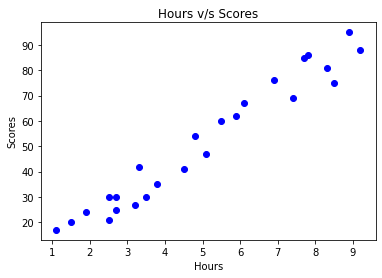

In [5]:
plt.scatter(x='Hours',y='Scores', data=data, c='blue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours v/s Scores')

Data appears quite linear. So fitting model will not be a problem. Losses would be quite minimal.

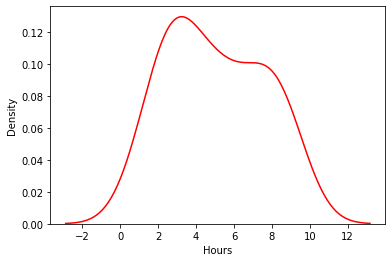

In [6]:
sns.kdeplot(data['Hours'], color='red')

"Hours" is somewhat normally distributed.

Since, our data is following linear relation between dependent and independent features Therefore it doesn't need any transformation

## Spliting data into Train and Test

In [7]:
X=np.array(data['Hours']).reshape(-1,1)
Y=np.array(data['Scores']).reshape(-1,1)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.20, random_state=42) # Test data size is 20 percent of data

In [9]:
print(f'Shape of x_train {x_train.shape}')
print(f'Shape of x_test {x_test.shape}')
print(f'Shape of y_train {y_train.shape}')
print(f'Shape of y_test {y_test.shape}')

Shape of x_train (20, 1)
Shape of x_test (5, 1)
Shape of y_train (20, 1)
Shape of y_test (5, 1)


## Scale the Data

In [10]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) # Fit the MinMaxScaler on train data and transform
x_test = scaler.transform(x_test) # Fit the MinMaxScaler on train data and transform

## Create Variables to Pass to Model

In [11]:
X_train=np.array(x_train).reshape(-1,1)
Y_train=np.array(y_train).reshape(-1,1)
X_test=np.array(x_test).reshape(-1,1)
Y_test=np.array(y_test).reshape(-1,1)

## Initialize Model

In [12]:
reg=LinearRegression() # Load Linear Regression object

## Train the Model

In [13]:
reg.fit(X_train,Y_train) # Train the model on training data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation

In [14]:
prediction=reg.predict(X_test) # Get the predictions for Test Data

## Model Accuracy over Test Data

In [15]:
accuracy=reg.score(X_test,Y_test) # Get accuracy score for test data
print(f"Our model's accuracy is {np.round(accuracy*100,2)}%")

Our model's accuracy is 96.78%


## Get parameters of the model

In [16]:
print("The slope is ",reg.coef_)

The slope is  [[78.42483305]]


In [17]:
print("The y-intercept is ",reg.intercept_)

The y-intercept is  [13.47717832]


## Model Error Evaluation

In [18]:
print(f'Mean absolute error is {mean_absolute_error(Y_test, prediction)}')

Mean absolute error is 3.9207511902099226


In [19]:
print(f'Mean squared error is {mean_squared_error(Y_test, prediction)}')

Mean squared error is 18.943211722315247


In [20]:
print(f'Root mean absolute error is {np.sqrt(mean_squared_error(Y_test, prediction))}')

Root mean absolute error is 4.352380006653285


In [21]:
print(f'R-square value is : {r2_score(y_test, prediction)}') # R Square is Accuracy

R-square value is : 0.9678055545167994


## Plot Results for Train Data

### Equation of Line 

In [22]:
y=X_train*reg.coef_+reg.intercept_ # y = mx+c

### Plot Data and Line

Text(0.5, 1.0, 'Scores v/s Hours')

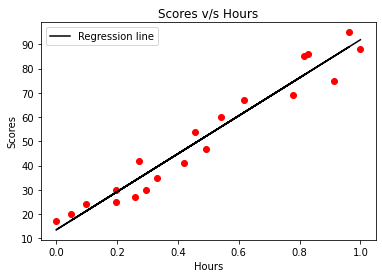

In [23]:
plt.plot(X_train,y, color='black')  # plots regression line
plt.scatter(x_train,y_train, color='red') # plots train data
plt.legend(['Regression line'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores v/s Hours')

## Plot Results for Train Data

### Equation of Line 

In [24]:
y=X_test*reg.coef_+reg.intercept_ # y = mx+c

### Plot Data and Line

Text(0.5, 1.0, 'Scores v/s Hours')

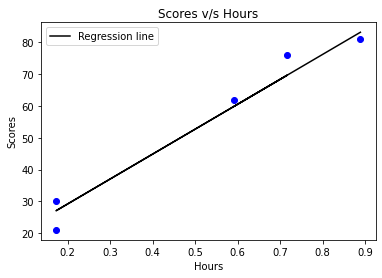

In [25]:
plt.plot(X_test,y, color='black') # plots regression line
plt.scatter(x_test, y_test, color='blue') # plots train data
plt.legend(['Regression line'])
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Scores v/s Hours')

## Predict on New Data

What will be the predicted score if a student studies for 8.53 hours?

In [26]:
hours=8.53
predicted_score=reg.predict(scaler.transform(np.array([hours]).reshape(-1,1))) # New Prediction

In [27]:
print(f'For {hours} Hours study the predicted marks scored will be {predicted_score[0][0]}')

For 8.53 Hours study the predicted marks scored will be 85.41501901140686


## Inference: Linear regression applied over the data and accuracy of about 97 percent achieved.